In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# prompt: split the data into train and test

from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (614, 8)
Testing data shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


k = 1, Accuracy = 0.6753
k = 2, Accuracy = 0.7013
k = 3, Accuracy = 0.6494
k = 4, Accuracy = 0.7078
k = 5, Accuracy = 0.6623
k = 6, Accuracy = 0.7273
k = 7, Accuracy = 0.6883
k = 8, Accuracy = 0.7468
k = 9, Accuracy = 0.7208
k = 10, Accuracy = 0.7662
k = 11, Accuracy = 0.7338
k = 12, Accuracy = 0.7792
k = 13, Accuracy = 0.7727
k = 14, Accuracy = 0.7727
k = 15, Accuracy = 0.7597
k = 16, Accuracy = 0.7792
k = 17, Accuracy = 0.7727
k = 18, Accuracy = 0.7597
k = 19, Accuracy = 0.7532
k = 20, Accuracy = 0.7273


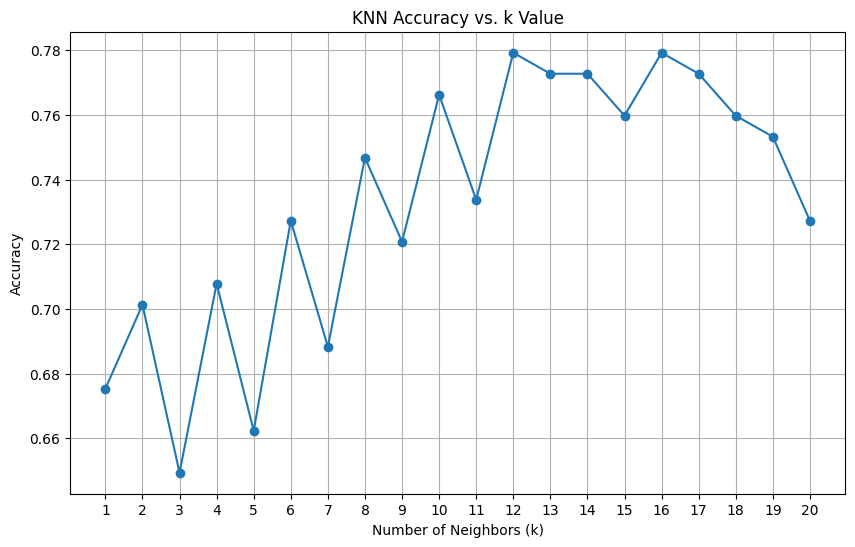


Best k value is: 12 with accuracy: 0.7792


In [ ]:
# prompt: use knn and for loop to loop for best k value and plot it

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21) # Test k from 1 to 20
accuracy_scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Plotting the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest k value is: {best_k} with accuracy: {max(accuracy_scores):.4f}")
